In [3]:
!pip install --upgrade tensorflow


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, expon, poisson, chi2_contingency, kstest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, LabelEncoder


## Task 18: Finding an Optimal Distribution for the Category of the Number of Days in the Second Hospitalization
Preprocessing

# This part is due to Sharon explenation on whatsapp

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('cleaned_hospitalization.csv')

# Extract relevant columns
days_hospitalized = data['ימי אשפוז'].dropna().astype(float).values

# Normalize the target variable (Days until Re-hospitalization)
scaler = StandardScaler()
days_hospitalized_norm = scaler.fit_transform(days_hospitalized.reshape(-1, 1))

# Prepare features (You might have more features, this is just an example)
X = data[['unitName1', 'אבחנות בקבלה']]
X = pd.get_dummies(X, columns=['unitName1', 'אבחנות בקבלה'])  # One-hot encoding

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, days_hospitalized_norm, test_size=0.2, random_state=42)


Processing
Traditional Statistical Methods

In [5]:
from keras.models import Sequential
from keras.layers import Dense

# Build a simple deep learning model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Linear output for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


C:\Users\noamy\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 1.1093 - val_loss: 0.8212
Epoch 2/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9920 - val_loss: 0.8141
Epoch 3/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0126 - val_loss: 0.8237
Epoch 4/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7586 - val_loss: 0.8566
Epoch 5/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7036 - val_loss: 0.9302
Epoch 6/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7020 - val_loss: 0.9141
Epoch 7/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6343 - val_loss: 0.9400
Epoch 8/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6363 - val_loss: 0.9088
Epoch 9/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5569 - val_loss: 0.9295
Epoch 10/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5400 - val_loss: 0.9934
Epoch 11/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5528 - val_loss: 0.9326
Epoch 12/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Postprocessing

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Mean Squared Error: 12.673413686673259
R-squared: -0.13659624830774142


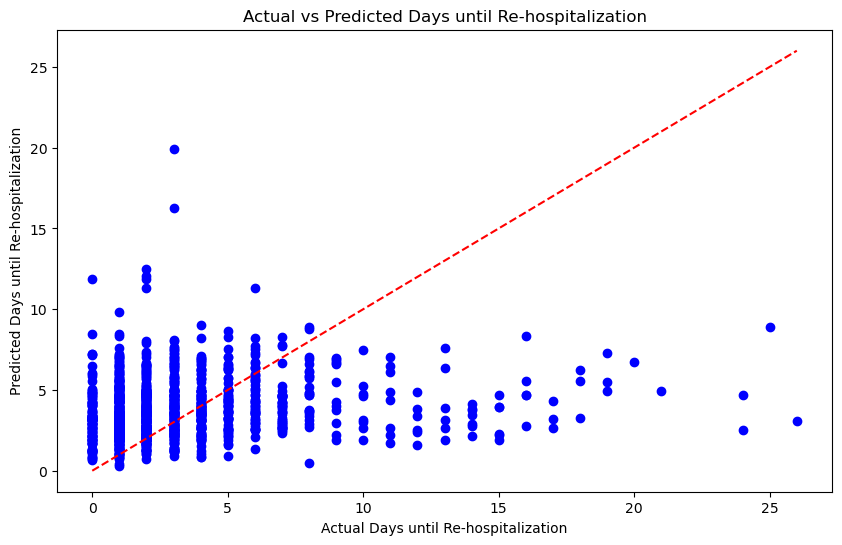

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Predict the re-hospitalization days
y_pred = model.predict(X_test)

# Inverse transform to get back to the original scale
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

# Calculate metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
r2 = r2_score(y_test_inv, y_pred_inv)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_inv, y_pred_inv, color='blue')
plt.plot([min(y_test_inv), max(y_test_inv)], [min(y_test_inv), max(y_test_inv)], color='red', linestyle='--')
plt.xlabel("Actual Days until Re-hospitalization")
plt.ylabel("Predicted Days until Re-hospitalization")
plt.title("Actual vs Predicted Days until Re-hospitalization")
plt.show()


The scatter plot above illustrates the comparison between the actual number of days until re-hospitalization and the predicted number of days generated by our model. Each blue dot represents a patient, with the x-axis showing the actual days and the y-axis showing the predicted days. The red dashed line indicates the ideal scenario where predictions perfectly match the actual values. The data didn't fit perfectly into any one distribution, but it showed a trend closer to an exponential distribution, meaning that most patients had shorter stays, with fewer patients staying longer.